# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [32]:
#First we will import all the required libararies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
np.random.seed(101) 
tf.set_random_seed(101)

In [2]:
# Now we will read the data
link = input('Please Enter Data: ')
if len(link) < 1:
    link = 'http://bit.ly/w-data'
data = pd.read_csv(link)
print(data)

Please Enter Data: 
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Moving on we will form a graph to see the relationship between the hours a student has studied the the percentage they have scored. First we will form two arrays using iloc in pandas and then we will form a plot using matplotlib libarary.

In [36]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 
n = len(x) # Number of Scores 

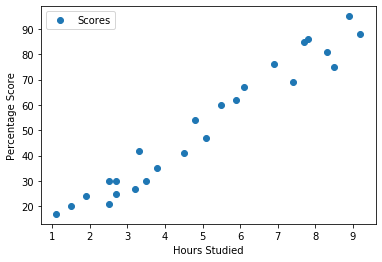

In [75]:
plt.plot(x, y, 'o',label ='Scores') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend() 
plt.show()

Now we will train a simple model on Tensorflow. We will use the gradient decent optimizer, keep the learning rate at 0.01, and will train 5000 epochs and will display the result after every 500 epochs.

In [33]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

In [49]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 
learning_rate = 0.01
training_epochs = 5000

In [50]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [51]:
# Starting the tf Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result 
        if (epoch + 1) % 500 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 500 : cost = 15082.912 W = 9.840385 b = 2.408953
Epoch 1000 : cost = 15075.639 W = 9.835532 b = 2.4390829
Epoch 1500 : cost = 15072.861 W = 9.833674 b = 2.4506283
Epoch 2000 : cost = 15071.782 W = 9.832955 b = 2.4550617
Epoch 2500 : cost = 15071.398 W = 9.832699 b = 2.456718
Epoch 3000 : cost = 15071.256 W = 9.832603 b = 2.4572825
Epoch 3500 : cost = 15071.212 W = 9.832577 b = 2.4574234
Epoch 4000 : cost = 15071.212 W = 9.832577 b = 2.4574234
Epoch 4500 : cost = 15071.212 W = 9.832577 b = 2.4574234
Epoch 5000 : cost = 15071.212 W = 9.832577 b = 2.4574234


Now we will plot the line of best fit

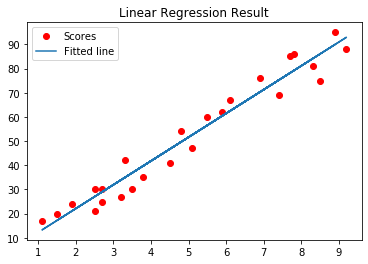

In [71]:
predictions = weight * x + bias
plt.plot(x, y, 'ro', label ='Scores') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

Now lets see how much percentage will a student score if studying 9.25 hours per day.

In [68]:
y_pred = np.array([])
i=0
while i < len(x):
    y_pred = np.append(y_pred,[weight * x[i] + bias])
    i+=1

In [69]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,21,27.038865
1,47,52.603565
2,27,33.921669
3,75,86.034326
4,30,36.871442


In [76]:
hours = 9.25
percent= weight*hours + bias
print("Predicted score if the student studies for 9.25 hours: ", percent)

Predicted score if the student studies for 9.25 hours:  93.40875840187073


### Evaluating the model


In [83]:
error= abs(y_pred-y)
mean_error= np.sum(error)/len(y)
print("The mean absolute error is: ", mean_error)

The mean absolute error is:  4.958014932632446
